原矩阵 A:
[[1 4 2 1 4 4 4 4 2 4 2 3 1 4 3 1]
 [1 1 3 2 3 4 4 3 1 2 2 2 2 1 2 1]
 [4 1 4 2 3 4 4 1 3 4 1 2 4 2 4 4]
 [3 4 1 2 2 2 4 1 4 3 1 4 4 3 4 3]
 [4 1 3 1 1 1 2 2 3 1 1 2 4 1 2 3]
 [3 4 1 2 2 4 2 2 4 3 4 4 3 3 4 1]
 [3 4 2 1 2 3 1 4 1 3 1 4 4 1 4 1]
 [1 1 1 3 4 1 4 3 4 4 2 2 2 1 2 2]
 [2 4 1 4 2 3 1 2 3 1 3 1 2 4 3 3]
 [2 1 4 2 2 4 1 3 3 4 3 4 4 4 3 2]
 [3 3 4 3 4 4 3 3 4 1 2 3 4 3 2 3]
 [2 1 3 3 4 1 4 3 4 1 1 3 1 3 4 3]
 [3 4 1 1 1 2 3 1 2 3 4 3 3 4 2 1]
 [1 1 4 4 1 3 3 1 1 4 1 2 3 1 1 4]
 [2 4 1 3 2 2 2 4 1 1 1 2 2 3 2 1]
 [1 2 3 2 2 4 2 1 1 1 4 4 2 3 2 4]]

倾斜后的矩阵 skewed_A:
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 3 1 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 2 4 4 4 0 0 0 0 0 0 0 0 0 0 0]
 [4 3 2 1 1 3 0 0 0 0 0 0 0 0 0 0]
 [4 4 3 2 3 4 3 0 0 0 0 0 0 0 0 0]
 [4 4 4 2 1 1 4 1 0 0 0 0 0 0 0 0]
 [2 3 4 2 1 2 2 1 2 0 0 0 0 0 0 0]
 [4 1 1 4 1 2 1 1 4 2 0 0 0 0 0 0]
 [2 2 3 1 2 4 2 3 1 1 3 0 0 0 0 0]
 [3 2 4 4 2 2 3 4 4 4 3 2 0 0

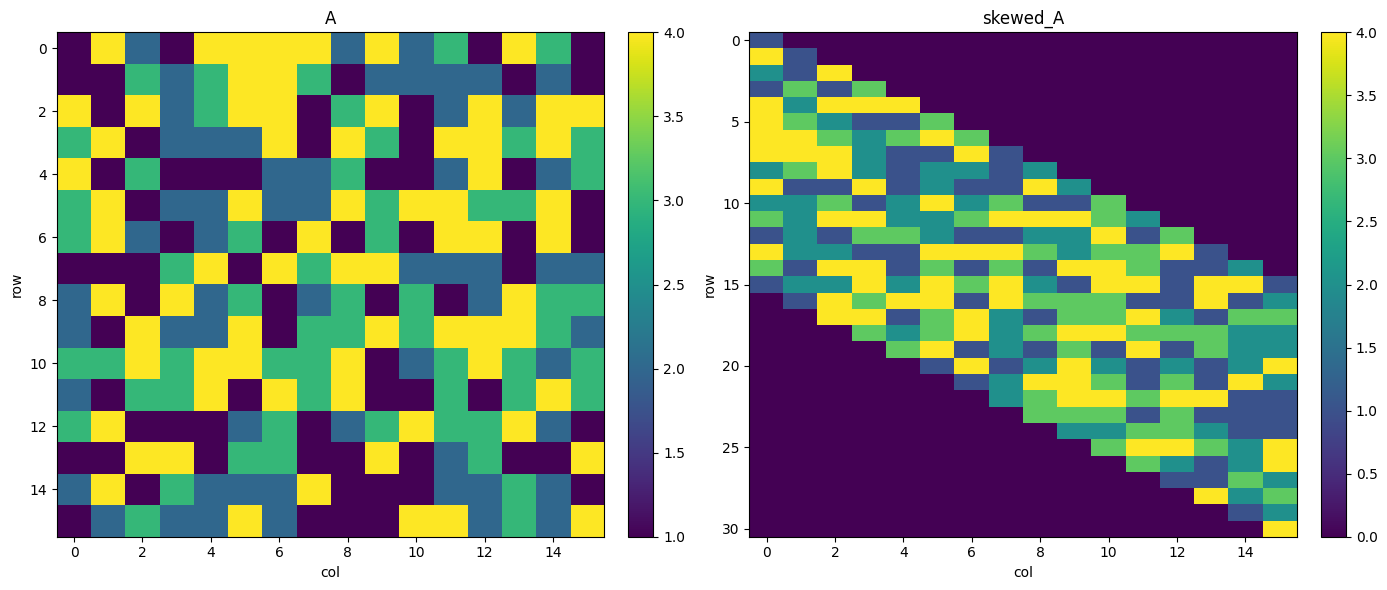

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def skew_matrix(A):
    m, n = A.shape  # 原矩阵的行数和列数
    skewed_rows = m + n - 1  # 倾斜后的列数
    skewed_cols = m + n - 1  # 倾斜后的列数
    # skewed_A = np.zeros((skewed_rows, n), dtype=A.dtype)  # 初始化新矩阵
    skewed_A = np.zeros((skewed_rows, m), dtype=A.dtype)  # 初始化新矩阵

    # 原矩阵的行索引和列索引
    i, j = np.indices(A.shape)

    # 新矩阵中行索引和列索引
    i_new = j + i 
    j_new = i

    # 变换
    skewed_A[i_new, j_new] = A

    return skewed_A


def affine(matrix, I_new, J_new, i_new, j_new):
    skewed_matrix = np.zeros((I_new, J_new), dtype=matrix.dtype)  # 初始化新矩阵
    skewed_matrix[i_new, j_new] = matrix
    return skewed_matrix

# 示例使用
if __name__ == "__main__":
    # 设置随机种子以便结果可重复
    np.random.seed(0)

    # 生成一个 16x16 的随机整数矩阵，元素值在 0 到 4 之间
    A = np.random.randint(1, 5, (16, 16))

    # 进行倾斜变换
    skewed_A = skew_matrix(A)

    # skewed_A = affine(A, A.shape[0]+A.shape[1]-1, A.shape[0], np.indices(A.shape)[0]+np.indices(A.shape)[1], np.indices(A.shape)[0])

    # 设置打印选项以适应大矩阵
    np.set_printoptions(edgeitems=16, linewidth=1000, suppress=True)

    print("原矩阵 A:")
    print(A)

    print("\n倾斜后的矩阵 skewed_A:")
    print(skewed_A)

    # 可视化原矩阵和倾斜后的矩阵
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 原矩阵热图
    im1 = axes[0].imshow(A, cmap='viridis', aspect='auto')
    axes[0].set_title('A')
    axes[0].set_xlabel('col')
    axes[0].set_ylabel('row')
    fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

    # 倾斜后矩阵热图
    im2 = axes[1].imshow(skewed_A, cmap='viridis', aspect='auto')
    axes[1].set_title('skewed_A')
    axes[1].set_xlabel('col')
    axes[1].set_ylabel('row')
    fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()

# 矩阵
# [[a11, a12],
#  [a21, a22],
#  [a31, a32]]
# 变为
# [[a11, a12],
#  [a21, a22],
#  [a31, a32]]